<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Kyle T. Mandli</td>
</table>

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

# Iterative Methods

In this lecture we will consider a number of classical and more modern methods for solving sparse linear systems like those we found from our consideration of boundary value problems.

## Jacobi and Gauss-Seidel

The Jacobi and Gauss-Seidel methods are simple approaches to introducing an iterative means for solving the problem $Ax = b$ when $A$ is sparse.  Consider again the Poisson problem $u_{xx} = f(x)$ and the finite difference approximation at the point $x_i$
$$
    \frac{U_{i-1} - 2 U_i + U_{i+1}}{\Delta x^2} = f(x_i).
$$

If we rearrange this expression to solve for $U_i$ we have
$$
    U_i = \frac{1}{2} (U_{i+1} + U_{i-1}) - f(x_i) \frac{\Delta x^2}{2}.
$$

For a direct method we would simultaneously find the values of $U_i$, $U_{i+1}$ and $U_{i-1}$ but instead consider the iterative scheme computes an update to the equation above by using the past iterate (values we already know)
$$
    U_i^{(k)} = \frac{1}{2} (U_{i+1}^{(k-1)} + U_{i-1}^{(k-1)}) - f(x_i) \frac{\Delta x^2}{2}.
$$

Since this allows us to evaluate $U_i^{(k)}$ without knowing the values of $U_{i+1}^{(k)} + U_{i-1}^{(k)}$ we directly evaluate this expression!  This process is called **Jacobi iteration**.  It can be shown that for this particular problem Jacobi iteration will converge from any initial guess $U^{(0)}$ although slowly.

Advantages
 - Matrix $A$ is never stored or created
 - Storage is optimal
 - $\mathcal{O}(m^2)$ are required per iteration

### Example
Let's try to solve the problem before in the BVP section but use Jacobi iterations to replace the direct solve
$$
    u_{xx} = e^x, ~~~~ x \in [0, 1] ~~~~ \text{with} ~~~~ u(0) = 0.0, \text{ and } u(1) = 3.
$$

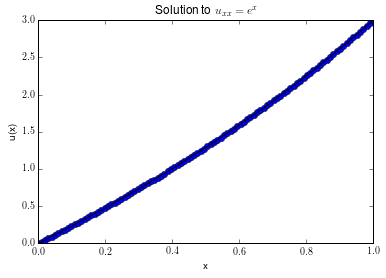

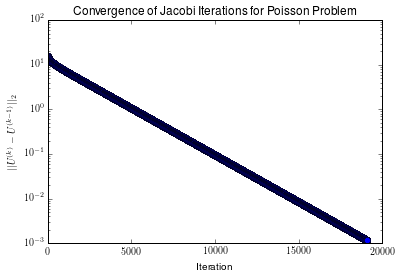

In [2]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: numpy.exp(x)
u_true = lambda x: (4.0 - numpy.exp(1.0)) * x - 1.0 + numpy.exp(x)

# Descretization
N = 100
x_bc = numpy.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Expected iterations needed
iterations_J = int(2.0 * numpy.log(delta_x) / numpy.log(1.0 - 0.5 * numpy.pi**2 * delta_x**2))

# Solve system
# Initial guess for iterations
U_new = numpy.zeros(N + 2)
U_new[0] = u_a
U_new[-1] = u_b
convergence_J = numpy.zeros(iterations_J)
for k in xrange(iterations_J):
    U = U_new.copy()
    for i in xrange(1, N + 1):
        U_new[i] = 0.5 * (U[i+1] + U[i-1]) - f(x_bc[i]) * delta_x**2 / 2.0

    convergence_J[k] = numpy.linalg.norm(u_true(x_bc) - U_new, ord=2)
        
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(iterations_J), convergence_J, 'o')
axes.set_title("Convergence of Jacobi Iterations for Poisson Problem")
axes.set_xlabel("Iteration")
axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")

plt.show()

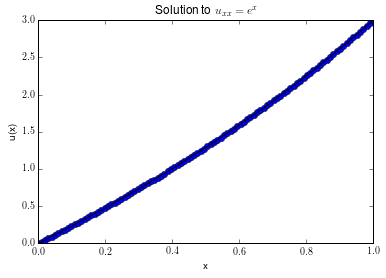

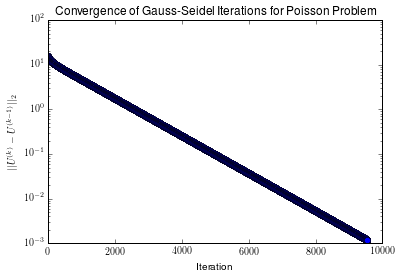

In [3]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: numpy.exp(x)
u_true = lambda x: (4.0 - numpy.exp(1.0)) * x - 1.0 + numpy.exp(x)

# Descretization
N = 100
x_bc = numpy.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# Expected iterations needed
iterations_GS = int(2.0 * numpy.log(delta_x) / numpy.log(1.0 - numpy.pi**2 * delta_x**2))

# Solve system
# Initial guess for iterations
U = numpy.zeros(N + 2)
U[0] = u_a
U[-1] = u_b
convergence_GS = numpy.zeros(iterations_GS)
success = False
for k in xrange(iterations_GS):
    for i in xrange(1, N + 1):
        U[i] = 0.5 * (U[i+1] + U[i-1]) - f(x_bc[i]) * delta_x**2 / 2.0

    convergence_GS[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)

# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(iterations_GS), convergence_GS, 'o')
axes.set_title("Convergence of Gauss-Seidel Iterations for Poisson Problem")
axes.set_xlabel("Iteration")
axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")

plt.show()

### Matrix Splitting Methods

One way to view Jacobi and Gauss-Seidel is as a splitting of the matrix $A$ so that
$$
    A = M - N.
$$

Then the system $A U = b$ can be viewed as
$$
    M U - N U = b \Rightarrow MU = NU + b.
$$

Viewing this instead as an iteration we have then
$$
    M U^{(k+1)} = N U^{(k)} + b.
$$
The goal then would be to pick $M$ and $N$ such that $M$ contains as much of $A$ as possible while remaining easier to solve than the original system.

The resulting update for each of these then becomes
$$
    U^{(k+1)} = M^{-1} N U^{(k)} + M^{-1} b = G U^{(k)} + c
$$
where $G$ is called the **iteration matrix** and $c = M^{-1} b$.  We also want
$$
    u = G u + c
$$
where $u$ is the true solution of the original $A u = b$, in other words $u$ is the fixed point of the iteration.  Is this fixed point stable though?  If the spectral radius $\rho(G) < 1$ we can show that in fact the iteration is stable.

For Jacobi the splitting is 
$$
    M = -\frac{2}{\Delta x^2} I, ~~\text{and}~~N = \frac{1}{\Delta x^2} \begin{bmatrix}
        0 & 1 & \\
        1 & 0 & 1 \\
          & \ddots & \ddots & \ddots \\
          & & 1 & 0 & 1 \\
          & &   & 1 & 0
    \end{bmatrix}
$$
(sticking to the Poisson problem).  $M$ is now a diagonal matrix and easy to solve.  

For Gauss-Seidel we have
$$
    M = \frac{1}{\Delta x^2} \begin{bmatrix}
        -2 &  & \\
         1 & -2 &  \\
           & \ddots & \ddots \\
           & & 1 & -2 & \\
           & &   & 1 & -2
    \end{bmatrix} ~~~ \text{and} ~~~ 
    N = \frac{1}{\Delta x^2} \begin{bmatrix}
         0 & 1 & \\
          & 0 & 1 \\
          & & \ddots & \ddots \\
           & &  & 0 & 1\\
           & &   &  & 0
    \end{bmatrix}
$$

### Stopping Criteria

How many iterations should we perform?  Let $E^{(k)}$ represent the error present at step $k$.  If we want to reduce the error at the first step $E^{(0)}$ to order $\epsilon$ then we have
$$
    ||E^{(k)}|| \approx \epsilon ||E^{(0)}||.
$$

Under suitable assumption we can bound the error in the 2-norm as
$$
    ||E^{(k)}|| \leq \rho(G)^k ||E^{(0)}||.
$$

Moving back to our estimate of the number of iterations we can combine our two expressions involving the error $E$ by taking $\Delta x \rightarrow 0$ which allows us to write
$$
    k \approx \frac{\log \epsilon}{\log \rho(G)}
$$
taking into account error convergence.  

Picking $\epsilon$ is a bit tricky but one natural criteria to use would be $\epsilon = \mathcal{O}(\Delta x^2)$ since our original discretization was 2nd-order accurate.  This leads to
$$
    k = \frac{2 \log \Delta x}{\log \rho}.
$$
This also allows us to estimate the total number of operations that need to be used.

For Jacobi we have the spectral radius of $G$ as
$$
    \rho_J \approx 1 - \frac{1}{2} \pi^2 \Delta x^2.
$$
so that
$$
    k = \mathcal{O}(m^2 \log m) ~~~\text{as}~~~ m \rightarrow \infty
$$
where $m$ here is now the number of points used.  

Combining this with the previous operation count per iteration we find that Jacobi would lead to $\mathcal{O}(m^3 \log m)$ work which is not very promising.  

For two dimensions we have $\mathcal{O}(m^4 \log m)$ so even compared to Gaussian elimination this approach is not ideal.

What about Gauss-Seidel?  Here the spectral radius is approximately
$$
    \rho_{GS} \approx 1 - \pi^2 \Delta x^2
$$
so that
$$
    k = \frac{2 * \log \Delta x}{\log (1 - \pi^2 \Delta x^2)}
$$
which still does not lead to any advantage over direct solvers.  It does show that Gauss-Seidel does actually converge faster due to the factor of 2 difference between $\rho_J$ and $\rho_{GS}$.

## Successive Overrelaxation (SOR)

Well that's a bit dissapointing isn't it?  These iterative schemes do not seem to be worth much but it turns out we can do better with a slight modification to Gauss-Seidel.  

If you look at Gauss-Seidel iteration it turns out it moves $U$ in the correct direction to $u$ but is very conservative in the amount.  If instead we do
\begin{align*}
    U^{GS}_i &= \frac{1}{2} \left(U^{(k+1)}_{i-1} + U^{(k)}_{i+1} - \Delta x^2 f_i\right) \\
    U^{(k+1)}_i &= U_i^{(k)} + \omega \left( U_i^{GS} - U_i^{(k)}\right )
\end{align*}
where we get to pick $\omega$ we can do much better.  

If $\omega = 1$ then we get back Gauss-Seidel.  

If $\omega < 1$ we move even less and converges even more slowly (although is sometimes used for multigrid under the name underrelaxation).  

If $\omega > 1$ then we move further than Gauss-Seidel suggests and any method where $\omega > 1$ is known as **successive overrelaxation** (SOR).

We can write this as a matrix splitting method as well.  We can combine the two-step formula above to find
$$
    U^{(k+1)}_i = \frac{\omega}{2} \left( U^{(k+1)}_{i-1} + U^{(k)}_{i+1} - \Delta x^2 f_i \right ) + (1 - \omega) U_i^{(k)}
$$
corresponding to a matrix splitting of
$$
    M = \frac{1}{\omega} (D - \omega L) ~~~\text{and}~~~ N = \frac{1}{\omega} ((1-\omega) D + \omega U)
$$
where $D$ is the diagonal of the matrix $A$, and $L$ and $U$ are the lower and upper triangular parts without the diagonal of $A$.

It can be shown that picking an $\omega$ such that $0 < \omega < 2$ the SOR method converges.  

It turns out we can also find an optimal $\omega$ for a wide class of problems.  For Poisson problems in any number of space dimensions for instance it can be shown that SOR method converges optimaly if
$$
    \omega_{opt} = \frac{2}{1 + \sin(\pi \Delta x)} \approx 2 - 2 \pi \Delta x.
$$

What about the number of iterations?  We can follow the same tactic as before with the spectral radius of $G_{SOR}$ now
$$
    \rho = \omega_{opt} - 1 \approx 1 - 2 \pi \Delta x.
$$

This leads to an iteration count of
$$
    k = \mathcal{O}(m \log m)
$$
an order of magnitude better than Gauss-Seidel alone!

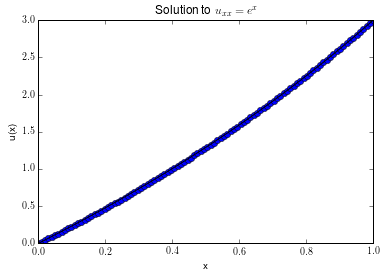

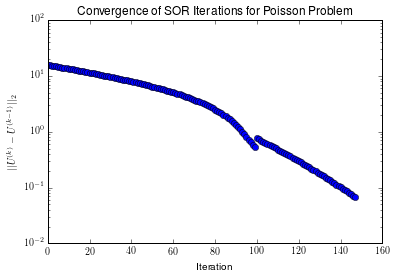

In [6]:
# Problem setup
a = 0.0
b = 1.0
u_a = 0.0
u_b = 3.0
f = lambda x: numpy.exp(x)
u_true = lambda x: (4.0 - numpy.exp(1.0)) * x - 1.0 + numpy.exp(x)

# Descretization
N = 100
x_bc = numpy.linspace(a, b, N + 2)
x = x_bc[1:-1]
delta_x = (b - a) / (N + 1)

# SOR parameter
omega = 2.0 / (1.0 + numpy.sin(numpy.pi * delta_x))

# Expected iterations needed
iterations_SOR = int(2.0 * numpy.log(delta_x) / numpy.log(omega - 1.0))

# Solve system
# Initial guess for iterations
U = numpy.zeros(N + 2)
U[0] = u_a
U[-1] = u_b
convergence_SOR = numpy.zeros(iterations_SOR)
success = False
for k in xrange(iterations_SOR):
    for i in xrange(1, N + 1):
        U_gs = 0.5 * (U[i-1] + U[i+1] - delta_x**2 * f(x_bc[i]))
        U[i] += omega * (U_gs - U[i])

    convergence_SOR[k] = numpy.linalg.norm(u_true(x_bc) - U, ord=2)
        
# Plot result
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.plot(x_bc, U, 'o', label="Computed")
axes.plot(x_bc, u_true(x_bc), 'k', label="True")
axes.set_title("Solution to $u_{xx} = e^x$")
axes.set_xlabel("x")
axes.set_ylabel("u(x)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(iterations_SOR), convergence_SOR, 'o')
axes.set_title("Convergence of SOR Iterations for Poisson Problem")
axes.set_xlabel("Iteration")
axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")
plt.show()

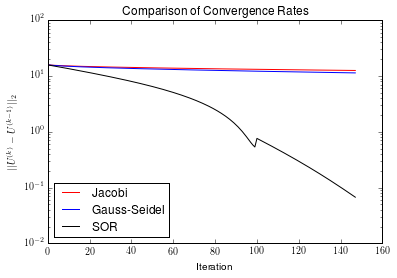

In [7]:
# Plotting all the convergence rates
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(range(iterations_SOR), convergence_J[:iterations_SOR], 'r', label="Jacobi")
axes.semilogy(range(iterations_SOR), convergence_GS[:iterations_SOR], 'b', label="Gauss-Seidel")
axes.semilogy(range(iterations_SOR), convergence_SOR, 'k', label="SOR")
axes.legend(loc=3)
axes.set_title("Comparison of Convergence Rates")
axes.set_xlabel("Iteration")
axes.set_ylabel("$||U^{(k)} - U^{(k-1)}||_2$")
plt.show()

## Conjugate Gradient

### Preconditioning

Possible other topics
 - GMRES
 - Arnoldi
 - Newton-Krylov
 - Multigrid